# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [4]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [6]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [7]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [8]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [9]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [10]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [11]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [12]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [13]:

# cantidad de nulos para users 

print("Cantidad de valores nulos en users:")
print(users.isna().sum())

# Proporción de valores nulos)
print("\nProporción de valores nulos en users:")
print(users.isna().mean())


Cantidad de valores nulos en users:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos en users:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [14]:
# cantidad de nulos para usage
print("\nCantidad de valores nulos en usage:")
print(usage.isna().sum())

print("\nProporción de valores nulos en usage:")
print(usage.isna().mean())


Cantidad de valores nulos en usage:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos en usage:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
  
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- Indica qué harías: ¿imputar, eliminar, ignorar?
  
En el dataset users, la columna city presenta un 11.7% de valores nulos, por lo que se recomienda mantenerlos como NaN o agruparlos en una categoría “Unknown”, ya que la ciudad no es crítica para el análisis principal; la columna churn_date tiene un 88.3% de valores nulos, lo cual es esperado porque solo se registra cuando el usuario abandona el servicio, por lo que debe conservarse sin imputar y usarse únicamente en análisis de churn.

En el dataset usage, la columna date tiene un 0.1% de valores nulos, por lo que se pueden eliminar esos pocos registros sin impacto significativo; las columnas duration (55.2%) y length (44.7%) presentan altos porcentajes de nulos, lo cual es consistente con el tipo de evento (llamadas vs mensajes), por lo que no deben imputarse ni eliminarse, sino analizarse de forma segmentada según la variable type.



### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [15]:

# explorar columnas numéricas de users
users.describe()



,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- La columna `age` ...

In [16]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas ...

In [17]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"\nValores únicos en {col}:")
    print(users[col].value_counts(dropna=False))



Valores únicos en city:
Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Valores únicos en plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64


- La columna `city` ...
- La columna `plan` ...

In [18]:

# explorar columna categórica de usage
# completa el código
usage['type'].value_counts(dropna=False)


text    22092
call    17908
Name: type, dtype: int64

- La columna `type` ...


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?

Se identificaron valores inválidos o sentinels principalmente en la columna age del dataset users, donde aparece el valor -999 como edad mínima, indicando un dato faltante o erróneo, y en la columna city, donde se observa un valor como "?", puede ser un registro nulo que representan información desconocida. En el dataset usage no se detectaron sentinels explícitos; sin embargo, se encontraron valores 0 en las columnas duration y length, que aunque no necesariamente son inválidos, deberán analizarse con contexto del tipo de evento para confirmar que corresponden a llamadas no conectadas o mensajes vacíos y no a errores de registro.

- ¿Qué acción tomarías?

Reemplazaría los valores -999 en la columna age por NaN y los excluiría de los análisis por edad o los imputaría según el contexto, sustituiría el valor "?" en la columna city por NaN o lo agruparía como "Unknown", y mantendría los valores 0 en las columnas duration y length ya que son coherentes con el comportamiento del servicio, limitándome a revisar posibles outliers extremos en etapas posteriores sin eliminar registros de forma anticipada.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [19]:

# Convertir a fecha la columna `reg_date` de users 
# completa el código
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')



In [20]:


# Convertir a fecha la columna `date` de usage
# completa el código
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')




In [21]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()


2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

La mayoría de los registros se concentran en los años 2022, 2023 y 2024, como era esperado, pero aparecen 40 registros con año 2026, que corresponde a un año futuro imposible según la fecha máxima de análisis. Esto indica errores de captura o inconsistencias en el dataset.

In [22]:

# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()


2024.0    39950
Name: date, dtype: int64

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

Todos los eventos de uso tienen año 2024, sin presencia de años futuros ni negativos. La columna es consistente y confiable para análisis temporal.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

En los datos de fechas se detectan años fuera de rango únicamente en reg_date, donde 40 registros muestran el año 2026, lo que es imposible según el periodo de análisis (máximo 2024) y sugiere errores de captura; en date de usage todos los años son 2024, por lo que no hay problemas. 

Analizaria en reg_date las fechas inválidas,si es posible las reemplazaria por NaN y, y en caso contrario analizar porque existe este año imputado.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [23]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median() 
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [24]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [25]:

# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT 

# Verificar cambios
users['reg_date'].dt.year.value_counts().sort_index()



2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [26]:
# Verificación MAR en usage (Missing At Random) para duration
usage.groupby('type')['duration'].apply(lambda x: x.isna().mean())

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [27]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby('type')['length'].apply(lambda x: x.isna().mean())

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

El diagnóstico de los nulos es que dependen completamente del tipo de evento (type), confirmando que son MAR (Missing At Random): en duration, casi todos los nulos corresponden a mensajes (text) que no tienen duración de llamada, mientras que en length, casi todos los nulos corresponden a llamadas (call) que no tienen longitud de mensaje. Por lo tanto, estos nulos son esperados y coherentes con la naturaleza de los datos, y la acción recomendada es dejarlos tal como están, analizando llamadas y mensajes por separado sin imputarlos ni eliminarlos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [28]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    "is_text": "sum",
    "is_call": "sum",
    "duration": "sum"
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [29]:

# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [30]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [31]:
# Resumen estadístico de las columnas numéricas
num_cols = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[num_cols].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [32]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

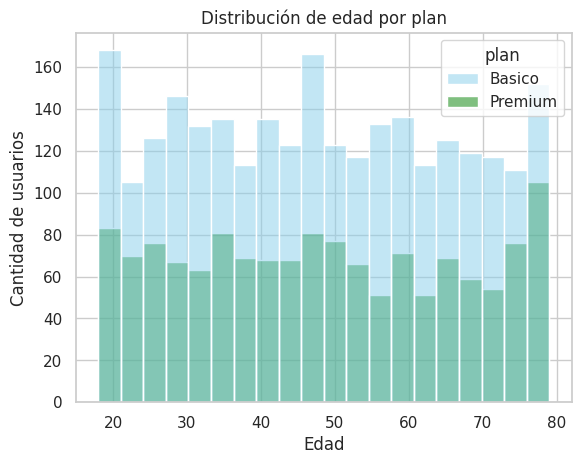

In [33]:
# Histograma para visualizar la edad (age)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = ['skyblue', 'green']

plt.show()
sns.histplot(data=user_profile, x='age', hue='plan', palette=palette, bins=20, kde=False)
plt.title("Distribución de edad por plan")
plt.xlabel("Edad")
plt.ylabel("Cantidad de usuarios")
plt.show()


💡Insights: 
- Distribución
  
La distribución de edad es relativamente simétrica, con la mayoría de usuarios entre 25 y 50 años. No se observa un patrón fuerte entre planes: ambos planes comparten rangos de edad similares.

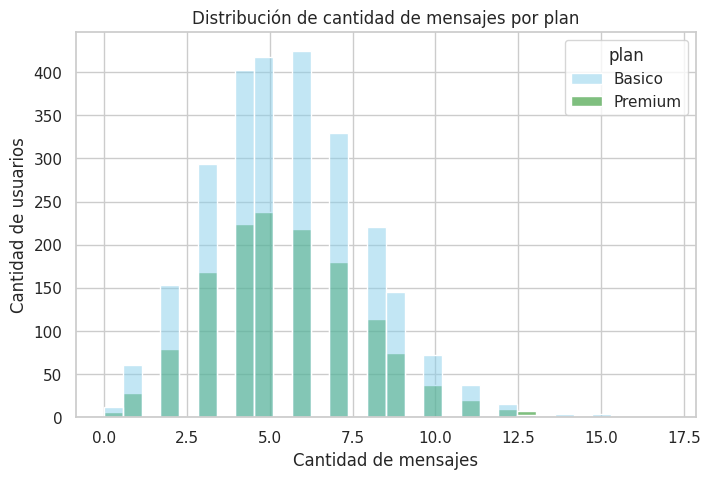

In [34]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=palette, bins=30, kde=False)
plt.title("Distribución de cantidad de mensajes por plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Cantidad de usuarios")
plt.show()

💡Insights: 

La distribución está sesgada a la derecha (muchos usuarios con pocos mensajes y pocos con muchos). Los usuarios Premium tienden a enviar más mensajes que los Básico, especialmente en los rangos altos.

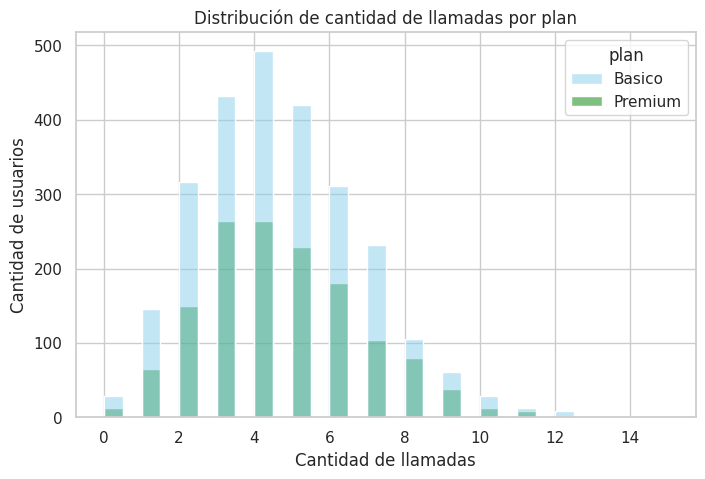

In [35]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=palette, bins=30, kde=False)
plt.title("Distribución de cantidad de llamadas por plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Cantidad de usuarios")
plt.show()

💡Insights: 
- Distribución

La distribución también está sesgada a la derecha. Los usuarios Básico tienden a hacer menos llamadas en comparación con Premium, aunque la mayoría hace entre 0 y 10 llamadas.

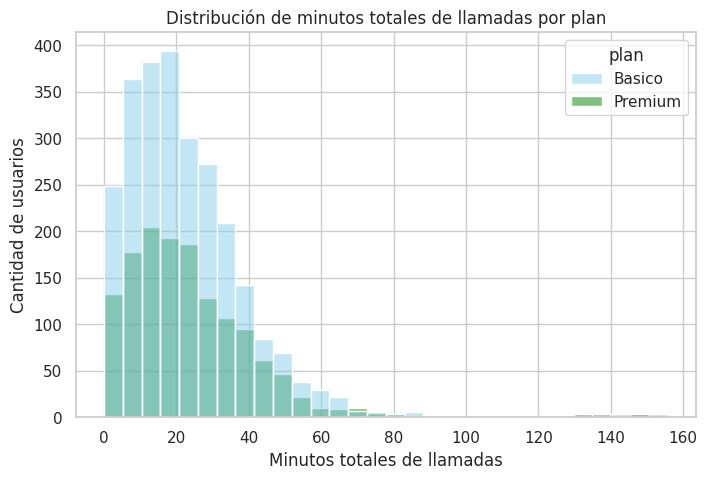

In [36]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=palette, bins=30, kde=False)
plt.title("Distribución de minutos totales de llamadas por plan")
plt.xlabel("Minutos totales de llamadas")
plt.ylabel("Cantidad de usuarios")
plt.show()

💡Insights: 
Distribución sesgada a la derecha. Los usuarios Premium concentran más minutos de llamadas que los Básico, lo que indica que los planes Premium capturan a clientes con uso más intensivo.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

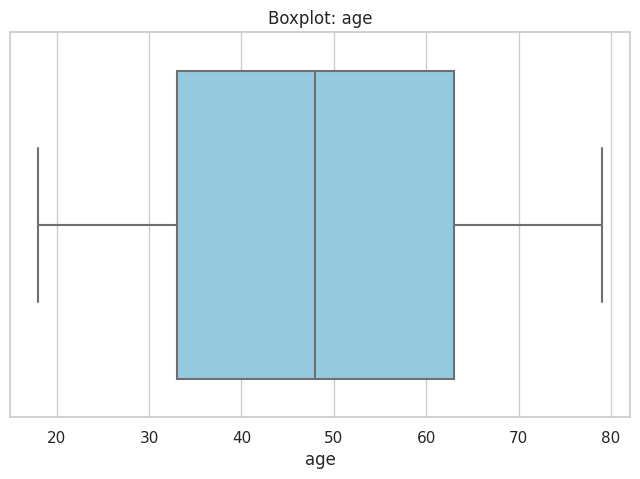

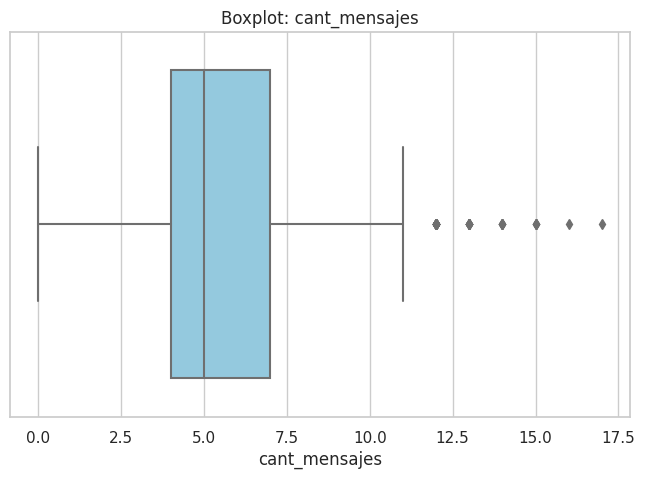

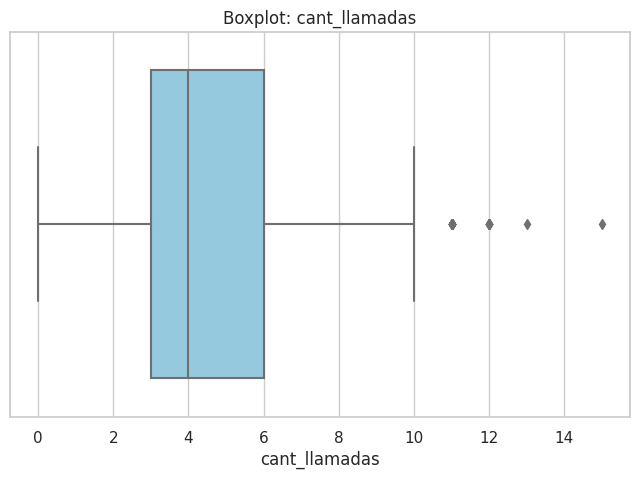

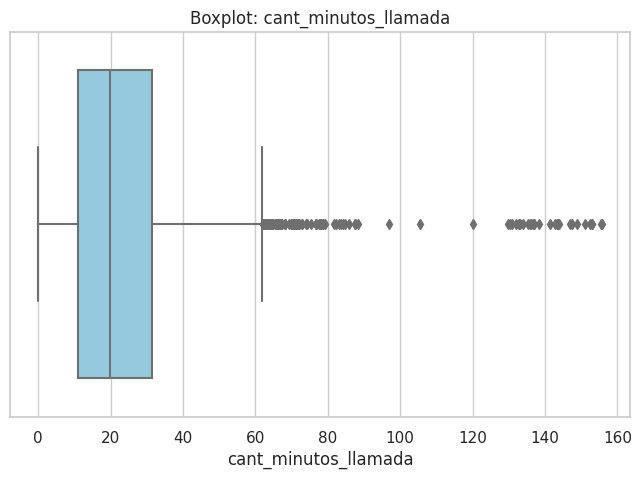

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=user_profile, x=col, color='skyblue')  # <-- usar color en lugar de palette
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
- Age: ...(presenta o no outliers)
No presenta outliers significativos; las edades se concentran entre 32 y 65 años, dentro de un rango esperado.

- cant_mensajes: ...
Presenta outliers a la derecha; algunos usuarios envían muchos más mensajes que la mayoría, reflejando clientes intensivos de mensajería.
  
- cant_llamadas: ...
Presenta outliers a la derecha; un pequeño grupo de usuarios realiza muchas más llamadas que el promedio, indicando clientes muy activos.

- cant_minutos_llamada: ...
Presenta outliers a la derecha; unos pocos usuarios acumulan un número elevado de minutos de llamada, consistente con comportamiento de uso intensivo.


In [55]:
# Calcular límites con el método IQR
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

limites_iqr = {}

for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    limites_iqr[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite_inferior': limite_inferior,
        'Limite_superior': limite_superior
    }
limites_iqr

{'age': {'Q1': 33.0,
  'Q3': 63.0,
  'IQR': 30.0,
  'Limite_inferior': -12.0,
  'Limite_superior': 108.0},
 'cant_mensajes': {'Q1': 4.0,
  'Q3': 7.0,
  'IQR': 3.0,
  'Limite_inferior': -0.5,
  'Limite_superior': 11.5},
 'cant_llamadas': {'Q1': 3.0,
  'Q3': 6.0,
  'IQR': 3.0,
  'Limite_inferior': -1.5,
  'Limite_superior': 10.5},
 'cant_minutos_llamada': {'Q1': 11.12,
  'Q3': 31.415,
  'IQR': 20.295,
  'Limite_inferior': -19.322500000000005,
  'Limite_superior': 61.8575}}

In [56]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no

for col in columnas_numericas:
    maximo = user_profile[col].max()
    limite_sup = limites_iqr[col]['Limite_superior']

    print(f'Variable: {col}')
    print(f'  Máximo real: {maximo:.2f}')
    print(f'  Límite superior IQR: {limite_sup:.2f}')
    print(f'  ¿Supera el límite?: {maximo > limite_sup}')
    print('-' * 50)


Variable: age
  Máximo real: 79.00
  Límite superior IQR: 108.00
  ¿Supera el límite?: False
--------------------------------------------------
Variable: cant_mensajes
  Máximo real: 17.00
  Límite superior IQR: 11.50
  ¿Supera el límite?: True
--------------------------------------------------
Variable: cant_llamadas
  Máximo real: 15.00
  Límite superior IQR: 10.50
  ¿Supera el límite?: True
--------------------------------------------------
Variable: cant_minutos_llamada
  Máximo real: 155.69
  Límite superior IQR: 61.86
  ¿Supera el límite?: True
--------------------------------------------------


💡Insights: 

El análisis mediante el método IQR identificó valores extremos en las variables de uso (mensajes, llamadas y minutos).
Sin embargo, estos valores no corresponden a errores de calidad de datos, sino a usuarios con mayor intensidad de consumo, lo cual es coherente con la dinámica del sector telecomunicaciones.

Debido a que el objetivo del proyecto es entender los patrones reales de uso y detectar segmentos diferenciados, los outliers se mantienen en el dataset, ya que constituyen información clave para la toma de decisiones comerciales y la optimización de planes.

- cant_mensajes: mantener o no outliers, porqué?
Representa usuarios con alto uso del servicio de mensajería, algo completamente esperable en telecomunicaciones. Los outputs en verdad no son errores, ya que este tipo de cliente suele consumir mas servicios digitales, por lo que lo convierte a ser un candidato ideal para tener planes con mayor capacidad.

- cant_llamadas: mantener o no outliers, porqué?
Indican usuarios con mayor frecuencia de contacto (uso laboral, comercial o familiar). No son anomalías estadísticas erróneas, sino diferencias naturales de comportamiento. Este patrón es esencial para diseñar planes personales y detectar perfiles profesionales o empresariales.

- cant_minutos_llamada: mantener o no outliers, porqué?
Reflejan clientes que realizan llamadas más largas, no errores.
Son fundamentales para entender:Consumo real del servicio, saturación del plan actual y oportunidades de upselling.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [63]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso' 


# Bajo uso
user_profile.loc[
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'

# Uso medio
user_profile.loc[
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) &
    (user_profile['grupo_uso'] != 'Bajo uso'),
    'grupo_uso'
] = 'Uso medio'

In [65]:
# verificar cambios
user_profile[['cant_llamadas', 'cant_mensajes', 'grupo_uso']].head()


,cant_llamadas,cant_mensajes,grupo_uso
0,3.0,7.0,Uso medio
1,10.0,5.0,Alto uso
2,2.0,5.0,Uso medio
3,3.0,11.0,Alto uso
4,3.0,4.0,Bajo uso


In [66]:
user_profile['grupo_uso'].value_counts()

Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64

### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [68]:
# Crear columna grupo_edad

user_profile['grupo_edad'] = 'Adulto Mayor' 

# Joven
user_profile.loc[user_profile['age'] < 30, 'grupo_edad'] = 'Joven'

# Adulto
user_profile.loc[
    (user_profile['age'] >= 30) & (user_profile['age'] < 60),
    'grupo_edad'
] = 'Adulto'

In [69]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

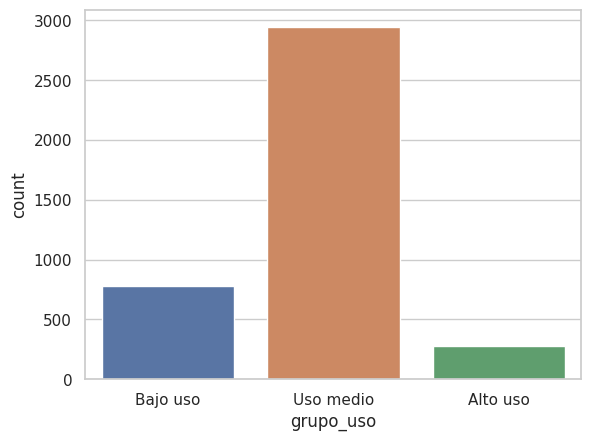

In [70]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', order=['Bajo uso', 'Uso medio', 'Alto uso'])

plt.show()

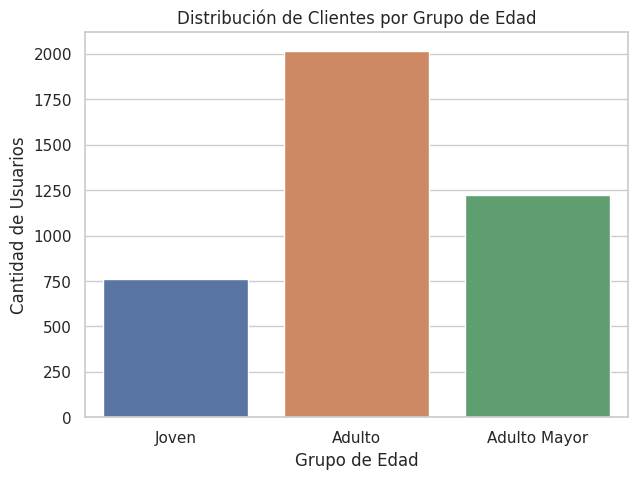

In [73]:
# Visualización de los segmentos por edad
plt.figure(figsize=(7,5))
sns.countplot(data=user_profile, x='grupo_edad', order=['Joven', 'Adulto', 'Adulto Mayor'])

plt.title('Distribución de Clientes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')

plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
Durante la fase de exploración y limpieza se detectaron los siguientes puntos de calidad:
    Valores faltantes y registros inconsistentes en variables de uso, especialmente en el dataset usage, que podían sesgar el cálculo de consumo por usuario.
    Tipos de datos incorrectos (fechas como texto, variables numéricas como string), lo que impedía análisis estadísticos directos.
    Registros duplicados o agregaciones incompletas que requerían consolidar la información a nivel usuario.

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
Se construyeron dos dimensiones de segmentación:

1. Segmentación por Nivel de Uso
Bajo uso: Usuarios con muy pocas llamadas y mensajes.
→ Consumo esporádico, posiblemente pagan por capacidad que no utilizan.
Uso medio: Grupo más equilibrado.
→ Representan el comportamiento típico esperado del servicio.
Alto uso: Usuarios intensivos en comunicación.
→ Mayor frecuencia de llamadas y mensajería; concentran gran parte del tráfico.

2. Segmentación por Edad
Jóvenes (<30 años): Mayor inclinación al uso frecuente del servicio.
Adultos (30–59 años): Uso balanceado, asociado a necesidades laborales y personales.
Adultos mayores (60+): Menor frecuencia, pero con llamadas más largas y puntuales.

La combinación de ambas variables muestra que el comportamiento no es homogéneo: el consumo depende tanto de la etapa de vida como de las necesidades de comunicación.
  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
Los segmentos con mayor valor estratégico son:

*Clientes de Alto Uso: quienes generan mayor tráfico y probabilidad de ingresos adicionales. Son candidatos ideales para planes premium o ilimitados. Presentan alta dependencia del servicio (mayor retención potencial).

*Adultos en Uso Medio–Alto: Representan estabilidad en ingresos. Consumo predecible, ideal para optimizar diseño de planes. Estos grupos combinan frecuencia + necesidad real del servicio, lo que los convierte en los más rentables y fidelizables.

- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
El análisis con IQR mostró valores extremos en: cant_mensajes, cant_llamadas y cant_minutos_llamada.

Sin embargo, estos outliers no son errores, sino que representan a usuarios intensivos reales (heavy users), casos coherentes con la naturaleza del negocio telecom.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**
El análisis demostró que la base de clientes de ConnectaTel es heterogénea y segmentable, con diferencias claras en intensidad de uso y comportamiento según edad.

Lejos de ser ruido estadístico, la variabilidad observada permite:

Entender mejor las necesidades reales de comunicación.
Diseñar ofertas más precisas.
Maximizar ingresos sin deteriorar la experiencia del cliente.

La principal oportunidad para ConnectaTel no está en reducir la variabilidad,
sino en aprovecharla estratégicamente mediante segmentación inteligente.

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Se identificaron valores faltantes, formatos incorrectos (especialmente en fechas y variables numéricas) y registros que requerían estandarización antes del análisis.
- Algunas variables de uso necesitaban ser agregadas correctamente a nivel usuario para reflejar el consumo real.


🔍 **Segmentos por Edad**
- Jóvenes (<30 años): muestran un comportamiento más dinámico en el uso del servicio, con mayor interacción en comunicación frecuente.
- Adultos (30–59 años): representan el grupo más estable, con un uso equilibrado entre llamadas y mensajes, muchas veces asociado a necesidades laborales y familiares.
- Adultos Mayores (60+): presentan menor frecuencia de uso, pero con patrones más puntuales, como llamadas más largas.


📊 **Segmentos por Nivel de Uso**
- Bajo uso: clientes con actividad limitada; probablemente no aprovechan completamente su plan actual.
- Uso medio: constituyen el comportamiento estándar esperado y la mayor parte de la base de clientes.
- Alto uso: usuarios intensivos que concentran gran parte del tráfico y presentan mayor dependencia del servicio.


➡️ Esto sugiere que la base de clientes no es homogénea y que existen necesidades claramente diferenciadas según el perfil del usuario, lo que abre oportunidades para personalizar la oferta.


💡 **Recomendaciones**
- Diseñar planes diferenciados por nivel de consumo, evitando que clientes de bajo uso paguen de más y ofreciendo beneficios adicionales a los de alto uso.
- Crear estrategias comerciales específicas por grupo etario, ajustando beneficios y comunicación a las necesidades de cada segmento.
- Aprovechar los usuarios de alto consumo como segmento clave para planes premium o ampliados, aumentando ingresos y fidelización.
- Utilizar esta segmentación como base para campañas dirigidas y mejora continua de la experiencia del cliente. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`